# Interface Analysis
Here we obtain interfacial residues from parsing the EBI PISA output files. We then assign these residues to monomers in the higher order complexes and highlight them.

## Parsing PISA
PISA outputs files as human-readable .txt files. This makes them tricky to parse. We focus on splitting the file on blank lines into chunk and scraping the relevant information from the chunks of interest

In [16]:
import os
import re
import itertools
from io import StringIO
from collections import OrderedDict
import pandas as pd

In [18]:
class interface_pocket_analysis(object):
    """Contains methods for parsing EBI PISA output interface .txt files"""
    def __init__(self, protein):
        self.protein = protein
        self.interface_path = 'interfaces/' + protein
        self.interfaces = self.get_interface_filenames()
    
    def get_interface_filenames(self):
        files =  os.listdir('interfaces/')
        return [f for f in files if self.protein in f]
    
    def parse_interface_one_residues(self):
        dfs = []
        for i in range(len(self.interfaces)):
            dfs.append(self._parse_interfaces('interfaces/' + self.interfaces[i], chunk=7))      
        return dfs

    def parse_interface_two_residues(self):
        dfs = []
        for i in range(len(self.interfaces)):
            dfs.append(self._parse_interfaces('interfaces/' + self.interfaces[i], chunk=10))      
        return dfs
    
    def _parse_interfaces(self, file_path, chunk):
        print(file_path)
        
        # Split file into list of chunks
        f = self.split_on_empty_lines(open(file_path).read())
        f = f[chunk].replace('| |', '|n|')
        f = f.replace(' ', '|')
    
        f = re.sub(r'(\|)\1+', r'\1', f)
        #Remove problematic HS columns
        f = f.replace('|H|', '|')
        f = f.replace('|S|', '|')
        f = f.replace('|HS|', '|')
        
        # Remove header lines
        f = f.split('\n')[4:-1]
        # Remove leading '|'
        f = [a[1:] for a in f]
        # Join list of strings on newlines
        f = '\n'.join(f)
        f = f.replace('|', ',')[1:]
        # Prep for pandas conversion
        F = StringIO(f)
        df = pd.read_csv(F, sep=",", header=None)
        df = df.loc[df[1] == 'I']
        columns = ['idx', 's|i', 'residue', 'res_num', 'asa', 'bsa', 'delta_G']
        return df
    
    def get_hbonds(self, chunk):
        f = self.f[chunk].replace(' ', '|')
        f = re.sub(r'(\|)\1+', r'\1', f)
        f = f.replace('|H|', '|')
        f = f.replace('|S|', '|')
        f = f.split('\n')[4:-1]
        f = [a[1:] for a in f]
        f = '\n'.join(f)
        f = f.replace('|', ',')[1:]
        return df
        
    def read_pocket_residues(self, pocket_path):
        f = open(filepath, 'r').read()   
        f = f.splitlines()
        f = f[20:-2]
        f = [re.sub('\s+', ',', g) for g in f]
        f = '\n'.join(f)
        columns = ['atom', '']
        F = StringIO(f)
        df = pd.read_csv(F, sep=',', header=None)
        df['res_ind'] = df[4]+':'+df[3]+':'+ df[5].astype(str)
        #df.columns = ['atom', 'atom_num', 'atom_type', 'residue', 'chain', 'res_num', ]
        return df
        
    @staticmethod
    def split_on_empty_lines(s):
        # greedily match 2 or more new-lines
        blank_line_regex = r"(?:\r?\n){2,}"
        return re.split(blank_line_regex, s.strip())

print(interface_pocket_analysis('wS_trimer-IGHV3-30-3-Conf1-6NB6').get_interface_filenames())
#print(interface_pocket_analysis('wS_trimer-IGHV3-30-3-Conf1-6NB6').parse_interface_one_residues())
#print(interface_pocket_analysis('wS_trimer-IGHV3-30-3-Conf1-6NB6').parse_interface_two_residues())

['wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_12.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_3.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_10.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_6.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_4.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_9.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_8.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_7.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_5.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_2.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_11.txt', 'wS_trimer-IGHV3-30-3-Conf1-6NB6.interface_1.txt']


### Obtain Interface Residues for each complex

In [19]:
def get_interface_residue_dict(files):
    interface_dict = {}
    for f in files:
        print(f)

        # Parse interface residues 
        interface_one = interface_pocket_analysis(f).parse_interface_one_residues()
        interface_two = interface_pocket_analysis(f).parse_interface_two_residues()
    
        # Combine and store residue arrays in a dictionary
        interfaces = pd.concat(interface_one + interface_two)
        interface_dict[f] = interfaces
    return interface_dict

# Get Intraviral Complexes
iv_files = os.listdir('structures/korkin_lab/IntraViralComplexes')
iv_files = [f[:-4] for f in iv_files if f.endswith('.pdb')]
print(iv_files)
intraviral_interfaces = get_interface_residue_dict(iv_files)

# Get Viral Human Complexes
vh_files = os.listdir('structures/korkin_lab/ViralHumanComplexes/')
vh_files = [f[:-4] for f in vh_files if f.endswith('.pdb')]
print(vh_files)
viral_human_interfaces = get_interface_residue_dict(vh_files)

['wN-Nterminal_domain_homopentamer-4UD1', 'wS_homotrimer-Conf2-5X5B', 'wNsp3-domain2_homotetramer-2acf', 'wNsp3-domain3_homotetramer-2wct', 'wNsp4_homodimer-3vc8', 'wE_homopentamer-5X29', 'wS_homotrimer-Conf1-5X58', 'wN-Cterminal_domain_homodimer-2JW8', 'wS_homotrimer-Conf1-6CS0', 'wNsp7-wNsp8-wNsp12_heterotetramer-6nur', 'wNsp9_tetramer-3ee7', 'wNsp5_homodimer-2gt7', 'wNsp10_dodecamer-2g9t', 'wNsp13_homodimer-6jyt', 'wNsp10-wNsp14_heterodimer-5c8u', 'wS_homotrimer-Conf2-6CS1', 'wS_homotrimer_treated-Conf1-6ACC', 'wS_homotrimer_treated-Conf2-6ACD', 'wNsp10-wNsp16_heterodimer-2xyq']
wN-Nterminal_domain_homopentamer-4UD1
interfaces/wN-Nterminal_domain_homopentamer-4UD1.interface_8.txt
interfaces/wN-Nterminal_domain_homopentamer-4UD1.interface_1.txt
interfaces/wN-Nterminal_domain_homopentamer-4UD1.interface_5.txt
interfaces/wN-Nterminal_domain_homopentamer-4UD1.interface_4.txt
interfaces/wN-Nterminal_domain_homopentamer-4UD1.interface_3.txt
interfaces/wN-Nterminal_domain_homopentamer-4UD1

## Visualise Interfaces

In [21]:
from ipymol import viewer as pymol

select interface_C, chain C and resi 918+921+922+924+925+928+929+931+932+935+936+944+947+948+951+965+966+967+968+969+970+972+973+974+975+976+977+979+981+982+983+984+985+987+918+920+921+923+924+927+928+930+931+934+939+942+945+946+949+952+953+956+957+940+941+942+943
select interface_A, chain A and resi 293+294+295+296+297+299+304+308+313+315+321+322+324+325+326+327+328+329+330+434+435+436+727+154+155+156+157+158+207+208+209+210+211+212+213+214+215+216+219+222+223+224+225+228+239+250+252+255+256+258+259+262+263+264+265+266+267+268+269+270+271+272+273+274+275+276+280+282+283+284+286+287+288+289+291+331+389+390+392+393+398+399+401+402+403+407+550+559+298+299+301+304+308
select interface_D, chain D and resi 988+991+992+994+995+996+998+999+150+159+113+72+26+53+43+57+39+197+63+44+85+69+158+39+154+12+80+991+994+997+998+159
select interface_B, chain B and resi 889+890+905+906+907+908+909+804+806+807+810+811+813+814+815+817+818+819+821+822+824+825+826+830+831+833+834+836+837+838+839+840+841+842+8

IntProgress(value=0, max=48)

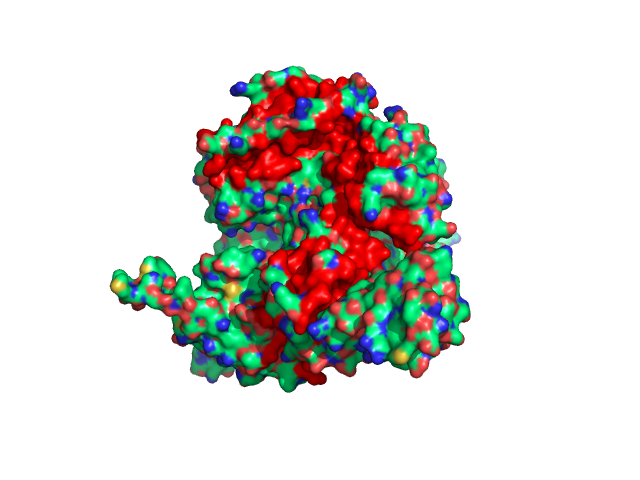

In [43]:
def visualise_interfaces(interface_dict, path_stem, protein, extension='.pse'):
    pymol.deleteAll()
    # Load structure, split chains and display as surface
    pymol.do(f'load {os.getcwd()}/structures/{path_stem}{protein}' + '.pdb')
    pymol.do('split_chains')
    pymol.show_as('surface')
    
    # Retrieve interface dataframes from dictionary
    interface_residues = interface_dict[protein]      
    
    # Identify chains to iterate selections over
    chains = set([r[0] for r in interface_residues[2]])

    for chain in chains:
        # Select interface residues for chains and color them red
        s = interface_residues.loc[interface_residues[2].str.startswith(chain)]
        selection_query = f'select interface_{chain}, chain {chain} and resi {s[3].astype(int).astype(str).str.cat(sep="+")}'
        print(selection_query)
        pymol.do(selection_query)
        pymol.do(f'color red, interface_{chain}')
        pymol.do(f'save pymol_files/interfaces/{path_stem}{protein}{extension}')

        
# Test function works        
visualise_interfaces(interface_dict=intraviral_interfaces,
                     path_stem='korkin_lab/IntraViralComplexes/',
                     protein='wNsp7-wNsp8-wNsp12_heterotetramer-6nur',
                     extension='.pse')
pymol.display()

### Write Interface Pymol Sessions

In [44]:
## Korkin Lab Complexes
### Intraviral Complexes
path_stem = 'korkin_lab/IntraViralComplexes/'
files = os.listdir('structures/' + path_stem)
files = [f[:-4] for f in files if f.endswith('.pdb')]
[visualise_interfaces(interface_dict=intraviral_interfaces,
                      path_stem=path_stem,
                      protein=f,
                      extension='.pse') for f in files]

### ViralHuman Complexes
path_stem = 'korkin_lab/ViralHumanComplexes/'
files = os.listdir('structures/' + path_stem)
files = [f[:-4] for f in files if f.endswith('.pdb')]
[visualise_interfaces(interface_dict=viral_human_interfaces,
                      path_stem=path_stem,
                      protein=f,
                      extension='.pse') for f in files]

select interface_C, chain C and resi 47+78+113+22+103+72+24+7+141+37+31+66+41+41+86+181+97+115+106+95+42+17+28+2+49+48+92+18+45+129+36+94+29+57+34+190+60+136+88+52+35+97+154+86+81+58+103+43+122+12+103+100+58+89+26+97+55+48+42+94+24+127+126+31+24+50+54+76+9+135+128+145+57+33+64+71+73+17+50+175+27+74+87+113+56+179+97+89+62+169+63+107+54+58+20+46+63+118+48+116+36+51+25+76+135+115+139+80+58+121+50+89+15+50+84+98+86+121+51+65+91+89+63+9+44+8+75+59+111+51+62+54+137+62+82+18+74+1+118+84+42+18+18+80+58+106+110+18+5+141+53+110+88+107+51+122+69+49+25+112+84+65+75+94+53+75+45+76+47+49+82+9+15+146+131+56+68+95+121+35+29+93+77+117+112+112+56+63+91+30+31+141+98+198+43+86+156+66+98+33+27+98+69+176+63+110+68+21+41+44+7+80+49+87+26+14+114+12+69+97+27+50+129+219+22+88+58+38+59+21+70+53+141+42+106+128+144+104+91+81+190+87+115+72+65+67+60+31+56+98+61+53+59+8+71+71+50+122+118+89+98+49+16+112+23+67+65+74+94+82+53+76+45+79+146+131+113+76+39+137+6+101+56+29+95+18+78+93+9+149+30+79+26+162+20+121+75+58+18+63+89

[None, None, None, None, None, None, None, None]